**OPTIMISATION AND MACHINE LEARNING PROJECT**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
health_data= pd.read_csv('/content/life_Revanth.csv')

In [3]:
health_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
health_data.shape

(2928, 22)

In [5]:
health_data.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income composition of resources,Schooling
2923,Zimbabwe,2004,Developing,44.3,723,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2924,Zimbabwe,2003,Developing,44.5,715,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2925,Zimbabwe,2002,Developing,44.8,73,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2926,Zimbabwe,2001,Developing,45.3,686,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2927,Zimbabwe,2000,Developing,46.0,665,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [6]:
health_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,underfivedeaths,Polio,Total expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2735.000000,2928.000000,2375.000000,2928.000000,2896.000000,2928.000000,2909.000000,2702.000000,2909.000000,2928.000000,2485.000000,2.284000e+03,2896.000000,2896.000000,2768.000000,2768.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.614856,740.321185,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,1.276454e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.050749,1990.930605,25.018337,11485.970937,19.959590,160.700547,23.416674,2.483273,23.706644,5.085542,14282.251492,6.103765e+07,4.420829,4.509609,0.210978,3.346440
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.905000,4.853964,77.000000,0.000000,19.300000,0.000000,78.000000,4.260000,78.000000,0.100000,463.852618,1.966738e+05,1.600000,1.575000,0.493000,10.100000
50%,2007.50000,72.100000,144.000000,3.000000,3.770000,65.611455,92.000000,17.000000,43.350000,4.000000,93.000000,5.750000,93.000000,0.100000,1764.973870,1.391756e+06,3.300000,3.400000,0.677000,12.300000
75%,2011.25000,75.700000,228.000000,22.000000,7.715000,442.614322,97.000000,362.250000,56.100000,28.000000,97.000000,7.490000,97.000000,0.800000,5932.899677,7.426746e+06,7.200000,7.200000,0.779250,14.300000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
health_data.rename(columns={ "Life expectancy":"Life_expectancy","Adult Mortality":"Adult_Mortality",
"infant deaths": "infant_deaths",
"percentage expenditure":"percentage_expenditure",
"Hepatitis B": "Hepatitis_B",
"Total expenditure":"Total_expenditure",
"Income composition of resources": "Income_composition_of_resources"},inplace=True)

In [8]:
health_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                      0
Adult_Mortality                      0
infant_deaths                        0
Alcohol                            193
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 32
underfivedeaths                      0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV_AIDS                             0
GDP                                443
Population                         644
thinness1to19years                  32
thinness5to9years                   32
Income_composition_of_resources    160
Schooling                          160
dtype: int64

<ipython-input-9-293631f5d94e>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(health_data.Population)


<Axes: xlabel='GDP', ylabel='Count'>

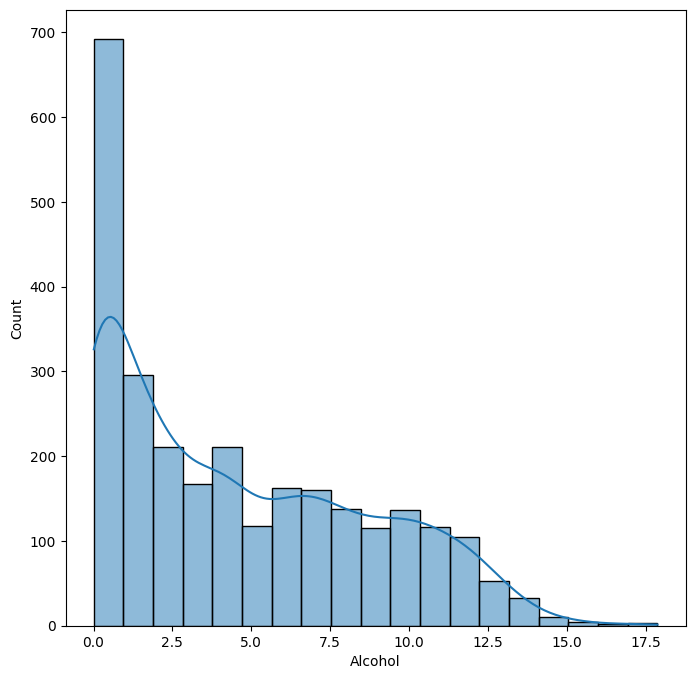

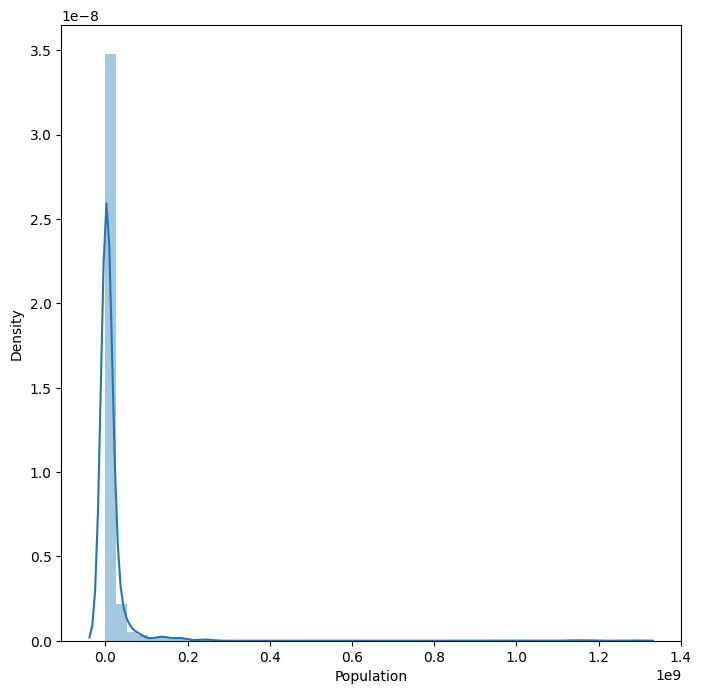

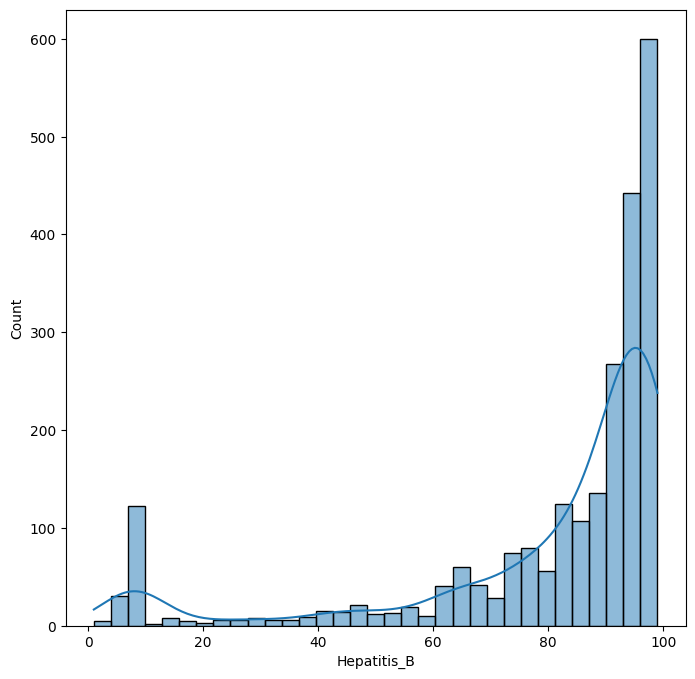

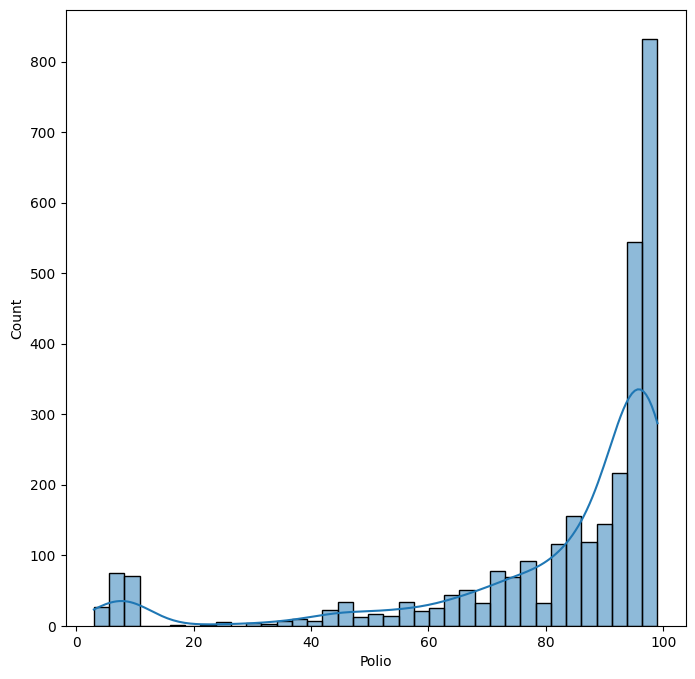

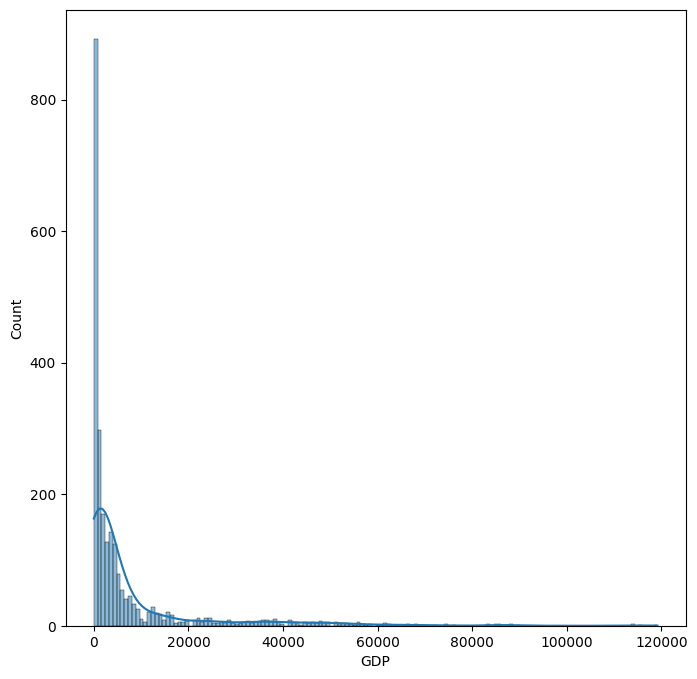

In [9]:
# analyse the distribution of data with missing values
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Alcohol, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.distplot(health_data.Population)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Hepatitis_B, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Polio, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.GDP, kde=True)

<Axes: xlabel='Schooling', ylabel='Count'>

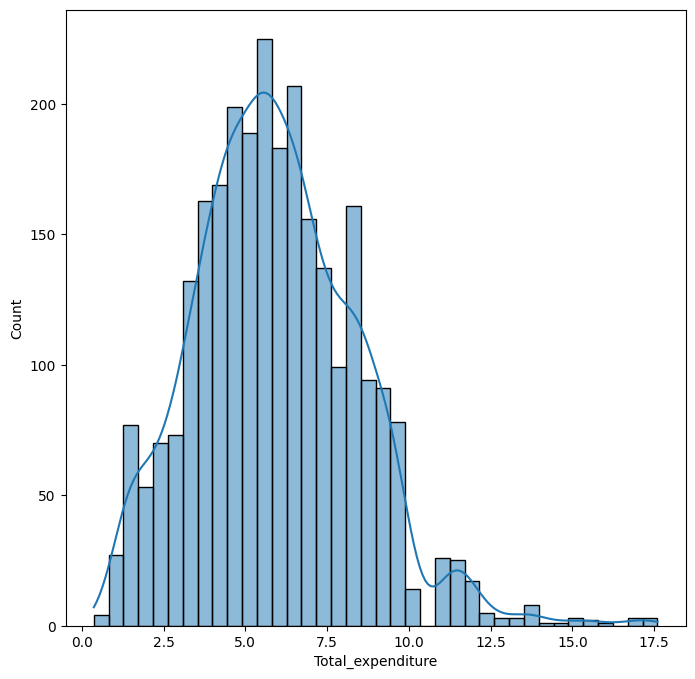

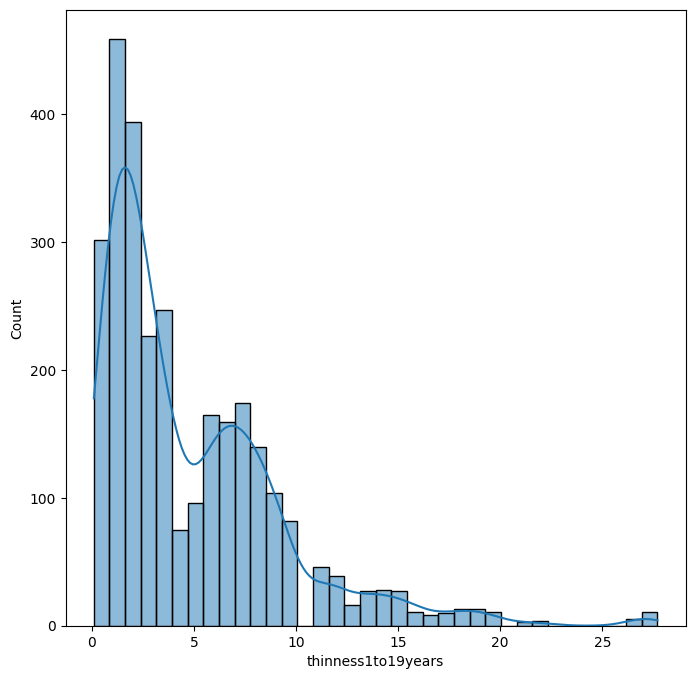

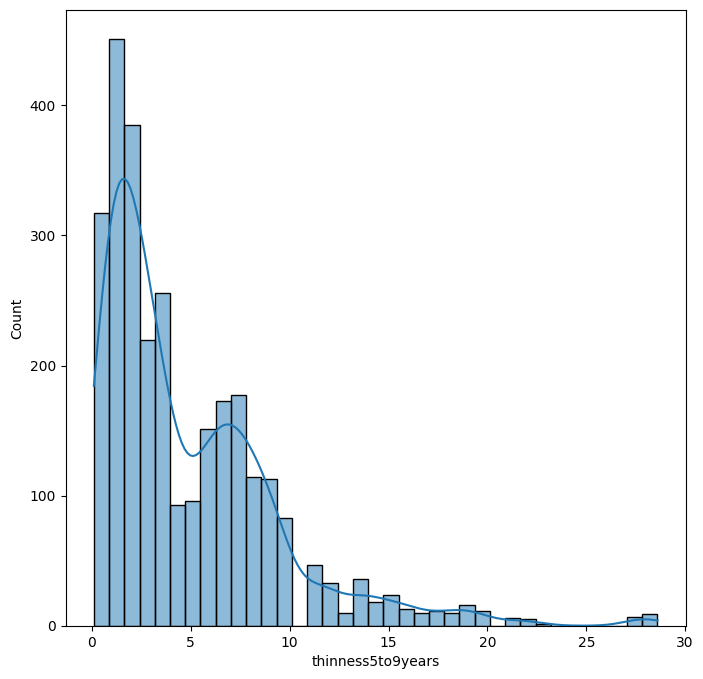

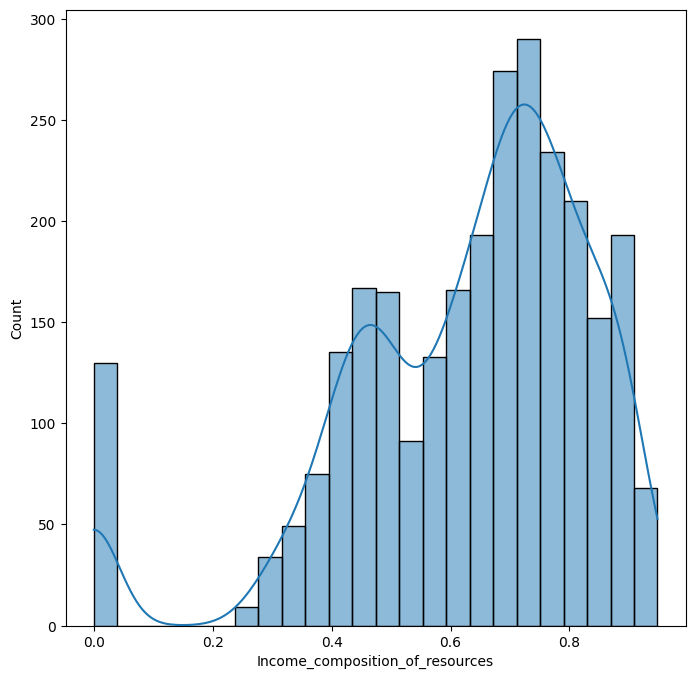

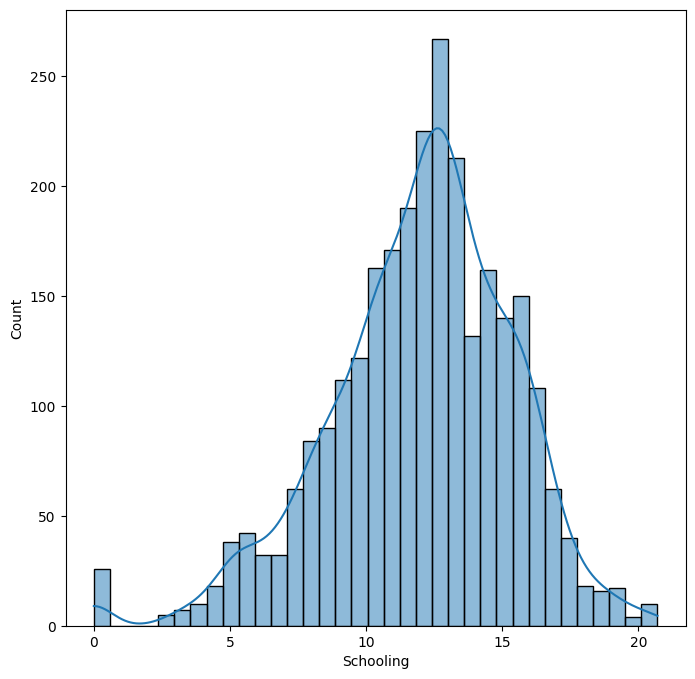

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Total_expenditure, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.thinness1to19years, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.thinness5to9years, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Income_composition_of_resources, kde=True)
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(health_data.Schooling, kde=True)


Since the __Dataset__ is amalgamation of Developing and Developed countries.


* we cannot just fill the missing values with the __MEAN__ of the data in all cases  because there are outliers in most of the Data points.


* I would therefore suggest use __Mean, Median, Mode,linear, polynomial intewrpolation etc__ to fill the missing Data points depending on the Plots distribution of the __respective Features__.





In [11]:

health_data['Alcohol'].interpolate(method='linear', inplace=True)
health_data['Hepatitis_B'].interpolate(method='linear', inplace=True)
health_data['Polio'].fillna(method='ffill', inplace=True)
health_data['Total_expenditure'].interpolate(method='linear', inplace=True)
health_data['GDP'].interpolate(method='linear', inplace=True)
health_data['Population'].interpolate(method='linear', inplace=True)
health_data['thinness1to19years'].fillna(health_data['thinness1to19years'].median(),inplace=True)
health_data['thinness5to9years'].fillna(health_data['thinness5to9years'].median(),inplace=True)
health_data['Income_composition_of_resources'].interpolate(method='linear', inplace=True)
health_data['Schooling'].interpolate(method='linear', inplace=True)




In [12]:
health_data.isnull().sum()

Country                             0
Year                                0
Status                              0
Life_expectancy                     0
Adult_Mortality                     0
infant_deaths                       0
Alcohol                             0
percentage_expenditure              0
Hepatitis_B                         0
Measles                             0
BMI                                32
underfivedeaths                     0
Polio                               0
Total_expenditure                   0
Diphtheria                         19
HIV_AIDS                            0
GDP                                 0
Population                          0
thinness1to19years                  0
thinness5to9years                   0
Income_composition_of_resources     0
Schooling                           0
dtype: int64

In [13]:
# drop the missing values,
health_data = health_data.dropna(how='any')

In [14]:
health_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
underfivedeaths                    0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness1to19years                 0
thinness5to9years                  0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [15]:
health_data.shape

(2888, 22)

**Splitting the data into training data and test data**

Before splitting the data, it is important to remove the non-contributuing coulums in the __Dataset__.

__ex: Country, Development Status and Year__

The above datapoints play no role in the __ML Model__ we are going to build. Since we are asked to predict the Life expectancy of the citizen of a specific country. So it would be ideal to use the __LINEAR REGRESSION MODEL__

In [16]:
health_data= health_data.drop(['Country', 'Year', 'Status'], axis=1)

In [17]:
#correlation matrix
correlation_matrix = health_data.corr()

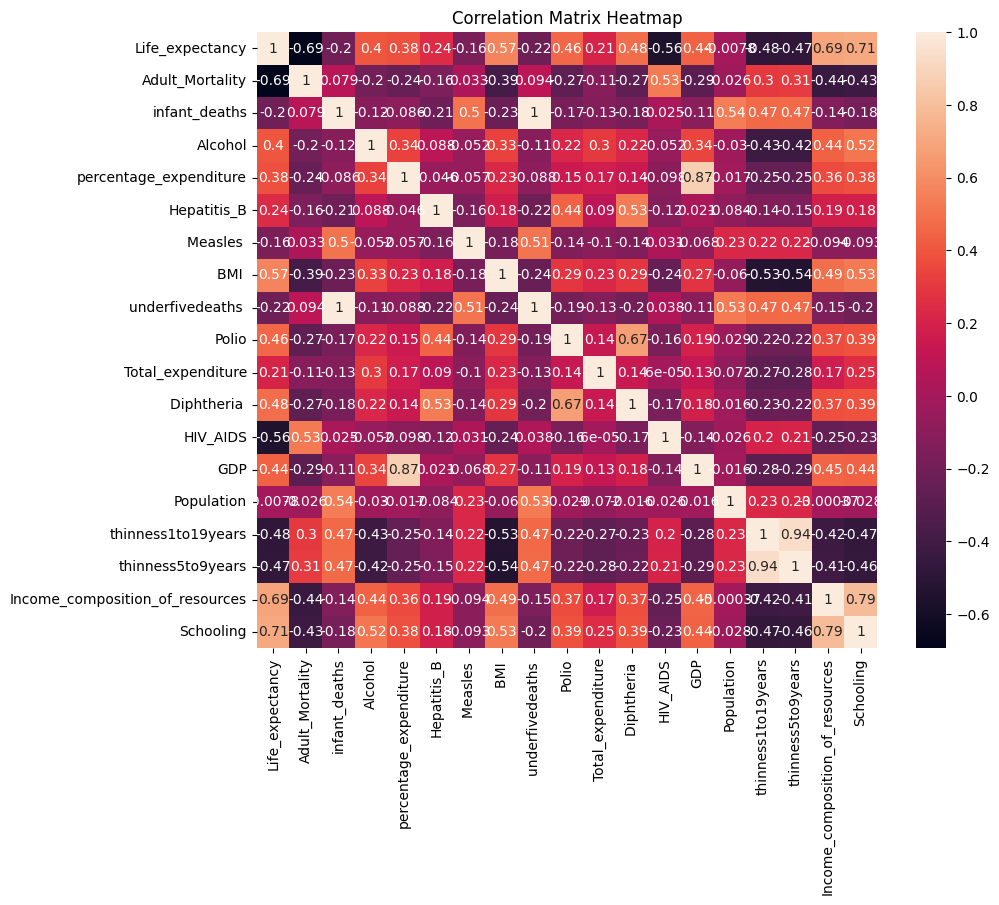

In [18]:
#plotting correlation_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [19]:
health_data.shape

(2888, 19)

In [20]:
health_data.head()

,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,underfivedeaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income_composition_of_resources,Schooling
0,65.0,263,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [21]:
#choosing the variable to be predicted
target= health_data['Life_expectancy']

In [22]:
target.shape

(2888,)

In [23]:
#selecting all the features that are given as inputs to the Training Model
inputs= health_data.drop(['Life_expectancy'], axis=1)

In [24]:
inputs.shape

(2888, 18)

In [25]:
#splitting the data using the train_test_split function
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs, target, test_size=0.2, random_state=42)

In [26]:
print(inputs_train.shape)
print(inputs_test.shape)
print(target_train.shape)
print(target_test.shape)

(2310, 18)
(578, 18)
(2310,)
(578,)


In [27]:
inputs_train.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,underfivedeaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income_composition_of_resources,Schooling
1427,28,9,0.01,0.000000,79.0,32,19.4,12,78.0,2.12,79.0,0.3,15527.080712,1.455118e+06,9.1,9.2,0.554,10.2
965,284,3,3.48,0.000000,97.0,2,24.1,6,97.0,5.75,97.0,2.1,3992.295938,8.097275e+05,8.2,8.1,0.439,8.8
1234,17,32,0.01,447.369500,66.0,669,57.8,39,7.0,5.92,68.0,0.1,6925.224460,3.388314e+07,5.3,5.1,0.659,10.3
662,11,1,4.01,818.877102,96.0,0,56.9,1,99.0,11.78,96.0,0.1,5484.776300,5.077382e+04,3.4,3.2,0.782,17.7
2431,86,2,11.12,1934.398154,77.0,152,57.6,2,95.0,7.21,95.0,0.1,14676.769000,4.567864e+06,0.6,0.5,0.820,15.7


In [28]:
inputs_test.head()

,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,underfivedeaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness1to19years,thinness5to9years,Income_composition_of_resources,Schooling
471,199,16,2.24,53.100090,91.0,4211,15.3,18,91.0,5.55,91.0,0.7,745.787787,1.388590e+05,11.2,11.4,0.511000,10.500000
1206,189,143,0.08,125.798068,82.0,20818,22.1,174,85.0,2.83,78.0,0.3,2254.445660,2.393448e+07,1.7,1.6,0.645000,11.700000
2387,48,43,7.38,1089.954838,68.0,32,48.7,56,65.0,8.79,65.0,7.6,7548.163698,5.256516e+06,6.0,7.3,0.644000,12.800000
2109,225,1,6.71,0.000000,99.0,4929,47.2,1,98.0,8.31,97.0,0.1,10870.379766,1.868126e+07,3.4,3.6,0.798909,14.545455
2924,715,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,1.263390e+07,9.8,9.9,0.418000,9.500000


In [29]:
target_train.head()

1427    64.4
965     59.3
1234    69.5
662     78.1
2431    79.1
Name: Life_expectancy, dtype: float64

In [30]:
target_test.head()

471     65.6
1206    67.9
2387    59.2
2109    67.5
2924    44.5
Name: Life_expectancy, dtype: float64

In [31]:
#checking whether the data is standardised or not, if it is standardised the output is ONE
print(inputs_train.std())

Adult_Mortality                    1.228186e+02
infant_deaths                      1.165347e+02
Alcohol                            3.984999e+00
percentage_expenditure             1.966681e+03
Hepatitis_B                        2.498875e+01
Measles                            1.176126e+04
BMI                                2.007334e+01
underfivedeaths                    1.603041e+02
Polio                              2.313608e+01
Total_expenditure                  2.405795e+00
Diphtheria                         2.374622e+01
HIV_AIDS                           5.138791e+00
GDP                                1.355613e+04
Population                         4.994150e+07
thinness1to19years                 4.416184e+00
thinness5to9years                  4.508322e+00
Income_composition_of_resources    2.058004e-01
Schooling                          3.195062e+00
dtype: float64


Since the values are not __STANDARDISED__ we will use the __StandardScalar()__ function Standardise the DATASET before feeding it to the __Traing Model__

In [32]:
#For standardisation of the data we use StandardScalar function
scaler = StandardScaler()

In [33]:
scaler.fit(inputs_train)

StandardScaler()

In [34]:
inputs_train_standardized = scaler.transform(inputs_train)

In [35]:
inputs_test_standardized = scaler.transform(inputs_test)

In [36]:
print(inputs_train_standardized.std())
print(inputs_test_standardized.std())

1.0
1.0429030660284144


**Training of the Model**

As we can see from the above cell the outputs of standardisartion for __Training & Test Data__ for inputs_data is satisfactory, but we are not standardising the targets because we want to predict the "Life_Expectancy" and let the targets be as they are in the data set.
Now,we can proceed with the __Training of the Model__.

For this I choose __LinearRegression()__ model from ScikitLearn. Since our task is to predict a Value depending on the given features with least possible Error.

In [37]:
model = LinearRegression()

In [38]:
model.fit(inputs_train_standardized, target_train)

LinearRegression()

In [39]:
prediction=model.predict(inputs_test_standardized)

In [40]:
MSE=mean_squared_error(target_test, prediction)
R2SCORE=r2_score(target_test, prediction)

print(MSE)
print(R2SCORE)

15.664568853169072
0.8264685389240712


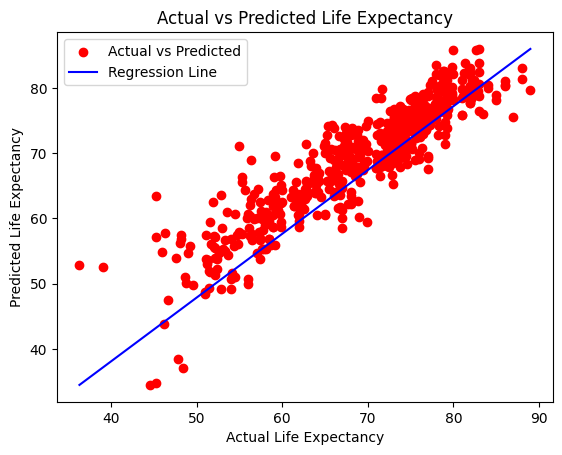

In [41]:
#plotting of the results
plt.scatter(target_test, prediction, color='red', label='Actual vs Predicted')
plt.plot([target_test.min(), target_test.max()], [prediction.min(), prediction.max()], color='blue', label='Regression Line')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.legend()
plt.show()

In [48]:
target_test.tail()

2841    71.0
163     74.9
2789    78.7
252     78.3
2063    76.6
Name: Life_expectancy, dtype: float64

**INDIVIDUAL COMPARISION OF TEST DATA**

Below I have tried to check individually the performance of the __test data__ with respect to the __Predicted values__. In most cases the Model gives us good predictability.

Moreover the distribution of Features is not constant and there are considerable differences between the features of developed and developing countries, The choice we made in replacing the Missing values plays a significant role in the __Output of the Model__

In [55]:
solo_prediction_0=model.predict(inputs_test_standardized[573].reshape(1,-1))
print(solo_prediction_0)

[67.80066829]


In [54]:
solo_prediction_1=model.predict(inputs_test_standardized[574].reshape(1,-1))
print(solo_prediction_1)

[74.0699999]


In [53]:
solo_prediction_2=model.predict(inputs_test_standardized[575].reshape(1,-1))
print(solo_prediction_2)

[79.45938471]


In [52]:
solo_prediction_3=model.predict(inputs_test_standardized[576].reshape(1,-1))
print(solo_prediction_3)

[80.28415431]


In [51]:
solo_prediction_4=model.predict(inputs_test_standardized[577].reshape(1,-1))
print(solo_prediction_4)

[77.09025887]
